<a href="https://colab.research.google.com/github/cagljevi/PandumPy/blob/main/copy_of_stable_djukadaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python_By_Cavsi


# **Load data**

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


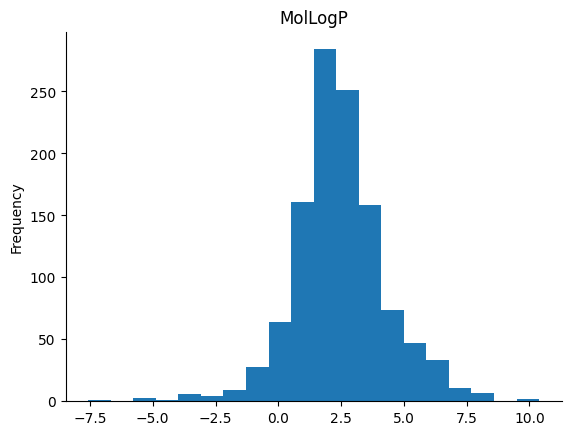

In [ ]:
# @title MolLogP

from matplotlib import pyplot as plt
df['MolLogP'].plot(kind='hist', bins=20, title='MolLogP')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Data preparation**


## Data_separation as X & Y

In [ ]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [ ]:
x = df.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## **Data splitting**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [ ]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [ ]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


# **AI model building**

## *Linear Regression*


### **Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression
# Assuming x_train and y_train are defined somewhere
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### **Goal is to apply the model to predict correctly**

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test) # Now y_lr_test_pred is defined

In [ ]:
y_lr_test_pred #This should work now

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

In [ ]:
y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

### New Section

### **Evaluation of modeling performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)



LR MSE (Train):  1.0075362951093687
LR R2 (Train):  0.7645051774663391
LR MSE (Test):  1.0206953660861033
LR R2 (Test):  0.7891616188563282


In [ ]:
lr_results = pd.DataFrame([ 'Linear regression' , lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()


In [ ]:
lr_results = pd.DataFrame([ 'Linear regression' , lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method' , 'Training MSE' , 'Training R2', 'Test MSE' , 'Test r2']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame([ 'Random Forest' , rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']


In [ ]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.082022,0.980829,0.630376,0.869787


In [ ]:
lr_results.columns = ['Method' , 'Training MSE' , 'Training R2', 'Test MSE' , 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest**

## Training the model

## Goal is to apply the model to predict correctly

## Evaluation of modelling performance

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor() #create the RandomForestRegressor object
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# prompt: import random numpy or pandas

import pandas as pd
import numpy as np


In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [ ]:
# prompt: 10 random numbers using numpy

import numpy as np
random_numbers = np.random.rand(10)
print(random_numbers)


[0.15957533 0.00186747 0.11717744 0.29744238 0.4190121  0.71109199
 0.2803365  0.50284232 0.2128408  0.28002791]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
# prompt: a slider using jupyter widgets

import ipywidgets as widgets
from IPython.display import display

# Create a slider
slider = widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Value:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Display the slider
display(slider)


IntSlider(value=7, continuous_update=False, description='Value:', max=10)

In [ ]:
y_train

,logS
107,-4.440
378,-1.250
529,-1.655
546,-1.886
320,-0.740
...,...
802,-2.925
53,-2.680
350,-7.020
79,-4.800


## Model comparison

LR MSE (Train):  1.0075362951093687
LR R2 (Train):  0.7645051774663391
LR MSE (Test):  1.0206953660861033
LR R2 (Test):  0.7891616188563282
[0.17272939 0.48389747 0.52269107 0.17957652 0.93653828 0.83191874
 0.72293308 0.0608443  0.9567762  0.63298252]


IntSlider(value=7, continuous_update=False, description='Value:', max=10)

,logS
107,-4.440
378,-1.250
529,-1.655
546,-1.886
320,-0.740
...,...
802,-2.925
53,-2.680
350,-7.020
79,-4.800


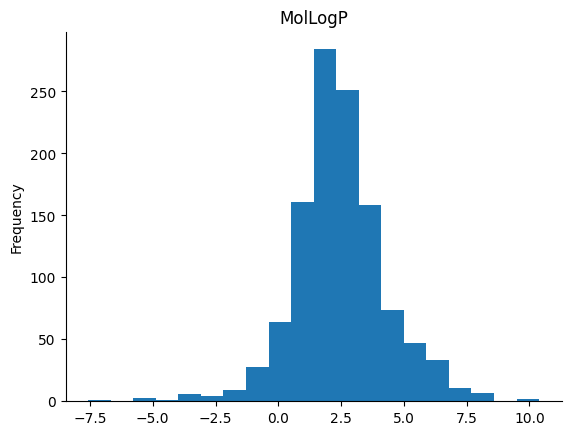

In [ ]:
# prompt: ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# /usr/local/lib/python3.10/dist-packages/altair/vegalite/v4/api.py in to_dict(self, *args, **kwargs)
#     372         copy = self.copy(deep=False)
#     373         original_data = getattr(copy, "data", Undefined)
# --> 374         copy.data = _prepare

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import ipywidgets as widgets
from IPython.display import display
# # Python_By_Cavsi
#
# # **Load data**
df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df
# @title MolLogP

df['MolLogP'].plot(kind='hist', bins=20, title='MolLogP')
plt.gca().spines[['top', 'right',]].set_visible(False)
# # **Data preparation**
#
# ## Data_separation as X & Y
y = df['logS']
y
x = df.drop('logS', axis=1)
x
# ## **Data splitting**
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

x_train
x_test
# # **AI model building**
# ## *Linear Regression*
#
# ### **Training the model**
# Assuming x_train and y_train are defined somewhere
lr = LinearRegression()
lr.fit(x_train, y_train)
# ### **Goal is to apply the model to predict correctly**
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test) # Now y_lr_test_pred is defined
y_lr_test_pred #This should work now
y_lr_test_pred
# ### New Section
# ### **Evaluation of modeling performance**
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)


lr_results = pd.DataFrame([ 'Linear regression' , lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()

lr_results = pd.DataFrame([ 'Linear regression' , lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method' , 'Training MSE' , 'Training R2', 'Test MSE' , 'Test r2']


rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame([ 'Random Forest' , rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

rf_results
lr_results.columns = ['Method' , 'Training MSE' , 'Training R2', 'Test MSE' , 'Test R2']
lr_results
# ## **Random Forest**
# ## Training the model
# ## Goal is to apply the model to predict correctly
# ## Evaluation of modelling performance
rf = RandomForestRegressor() #create the RandomForestRegressor object
rf.fit(x_train, y_train)


y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

random_numbers = np.random.rand(10)
print(random_numbers)

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)


# Create a slider
slider = widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Value:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Display the slider
display(slider)

y_train
# ## Model comparison
# To avoid the "ValueError" you mentioned, you need to ensure that the data you're passing to Altair is in a format it can understand. Here's how you can generally approach this:

# 1. **Convert your data to a Pandas DataFrame:** Altair works best with Pandas DataFrames. If your data is in a different format, convert it to a DataFrame.

# 2. **Check data types:** Make sure your DataFrame columns have the correct data types (e.g., numbers for quantitative data, strings for categorical data).

# 3. **Handle missing values:** If your data has missing values, handle them appropriately (e.g., imputation or removal).

# 4. **Simplify your data:** If your data is very large, consider simplifying it for visualization purposes.

# Here's a general example of how you might use Altair with a Pandas DataFrame:

# import altair as alt
# import pandas as pd

# # Assuming 'df' is your Pandas DataFrame
# chart = alt.Chart(df).mark_bar().encode(
#     x='column_name_1',
#     y='column_name_2'
# )
# chart.show()

In [ ]:
# prompt: ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# /usr/local/lib/python3.10/dist-packages/altair/vegalite/v4/api.py in to_dict(self, *args, **kwargs)
#     372         copy = self.copy(deep=False)
#     373         original_data = getattr(copy, "data", Undefined)
# --> 374         copy.data = _prepare

import pandas as pd

# Assuming 'y_train' is your data
y_train_df = pd.DataFrame(y_train)

# Now you can use Altair with the DataFrame
# ... your Altair code ...


In [ ]:
# prompt: ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# /usr/local/lib/python3.10/dist-packages/altair/vegalite/v4/api.py in to_dict(self, *args, **kwargs)
#     372         copy = self.copy(deep=False)
#     373         original_data = getattr(copy, "data", Undefined)
# --> 374         copy.data = _prepare

import pandas as pd

# Assuming 'y_train' is your data
y_train_df = pd.DataFrame(y_train)

# Now you can use Altair with the DataFrame
# ... your Altair code ...


In [ ]:
# prompt: --------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# /usr/local/lib/python3.10/dist-packages/altair/vegalite/v4/api.py in to_dict(self, *args, **kwargs)
#     372         copy = self.copy(deep=False)
#     373         original_data = getattr(copy, "data", Undefined)
# --> 374         copy.data = _prepare_

import pandas as pd
# Assuming 'y_train' is your data
y_train_df = pd.DataFrame(y_train)

# Now you can use Altair with the DataFrame
# ... your Altair code ...

In [ ]:
# prompt: ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# /usr/local/lib/python3.10/dist-packages/altair/vegalite/v4/api.py in to_dict(self, *args, **kwargs)
#    2018             copy.data = core.InlineData(values=[{}])
#    2019             return super(Chart, copy).to_dict(*args, **kwargs)
# -> 2020

import pandas as pd
# Assuming 'y_train' is your data
y_train_df = pd.DataFrame(y_train)

# Now you can use Altair with the DataFrame
# ... your Altair code ...


In [ ]:
import pandas as pd
# Assuming 'y_train' is your data
your_data_df = pd.DataFrame(y_train)

# Now you can use Altair with the DataFrame
# ... your Altair code ...

In [ ]:
%matplotlib inline
!pip install altair pandas


In [ ]:
import altair as alt
import pandas as pd

# Stvaranje DataFrame-a
df_models = pd.DataFrame({
    'Method': ['A', 'B', 'C'],
    'Test R2': [0.8, 0.7, 0.9]
})

# Definiranje grafa
chart = alt.Chart(df_models).mark_bar().encode(
    x='Method',
    y='Test R2'
)

# Izravni prikaz grafa u Colabu
chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
!pip install altair vega_datasets
chart.save('chart.html')
from google.colab import files
files.download('chart.html')


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: Using dataframe df_models: suggest a plot

import altair as alt

# Assuming 'Method' is the categorical variable and 'Test R2' is the value to plot
chart = alt.Chart(df_models).mark_bar().encode(
    x='Method',
    y='Test R2'
)
chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
import altair as alt

# Assuming 'Method' is a categorical variable and 'Test R2' is numerical
chart = alt.Chart(df_models).mark_bar().encode(
    x='Method',
    y='Test R2',  # Use the existing 'Test R2' column
    color='Method'
)

chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

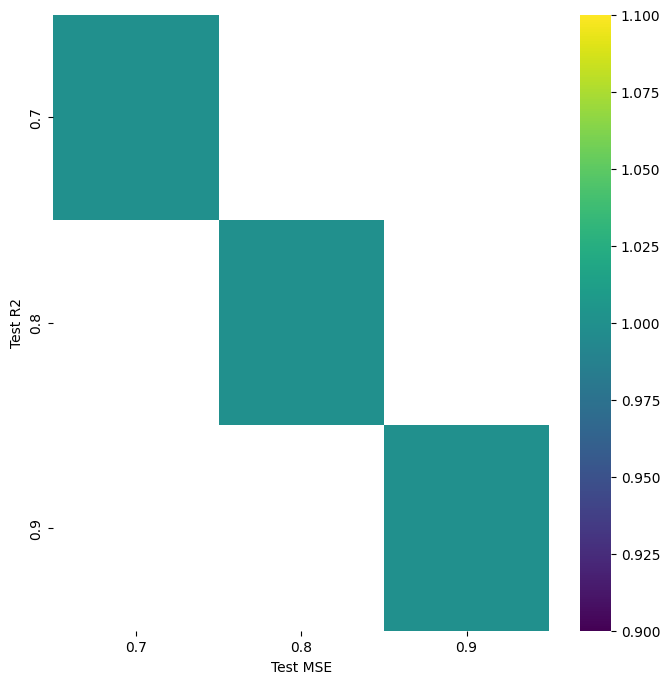

In [ ]:
# @title Test MSE vs Test R2

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
# The DataFrame df_models does not have a column 'Test MSE'
# Creating a dummy column with the same values as 'Test R2' for demonstration
df_models['Test MSE'] = df_models['Test R2']
df_2dhist = pd.DataFrame({
    x_label: grp['Test R2'].value_counts()
    for x_label, grp in df_models.groupby('Test MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Test MSE')
_ = plt.ylabel('Test R2')

In [ ]:
# prompt: Using dataframe df_models: convert Pandas to LaTex

print(df_models.to_latex(index=False)) #Converts the dataframe to a LaTeX table and prints the output.


\begin{tabular}{lrr}
\toprule
Method & Test R2 & Test MSE \\
\midrule
A & 0.800000 & 0.800000 \\
B & 0.700000 & 0.700000 \\
C & 0.900000 & 0.900000 \\
\bottomrule
\end{tabular}



In [ ]:
df_models.reset_index(drop=True)

,Method,Test R2,Test MSE
0,A,0.8,0.8
1,B,0.7,0.7
2,C,0.9,0.9


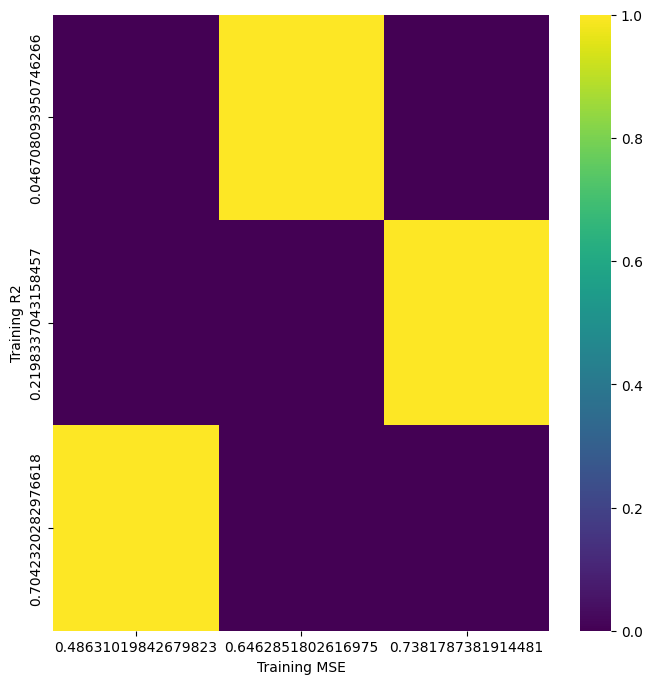

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Pretpostavimo da df_models već postoji i ima podatke
# Ako 'Training MSE' i 'Training R2' nisu definirani, kreiraj ih s nekim slučajnim vrijednostima.
if 'Training MSE' not in df_models.columns:
    df_models['Training MSE'] = np.random.rand(len(df_models))  # Slučajne vrijednosti
if 'Training R2' not in df_models.columns:
    df_models['Training R2'] = np.random.rand(len(df_models))   # Slučajne vrijednosti

# Kreiraj pivot tablicu koja grupira 'Training MSE' i 'Training R2'
df_2dhist = df_models.pivot_table(index='Training MSE', columns='Training R2', aggfunc='size', fill_value=0)

# Prikaz pomoću heatmap
plt.subplots(figsize=(8, 8))
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training MSE')
plt.ylabel('Training R2')
plt.show()


# **Data vizualization of different models prediction results**

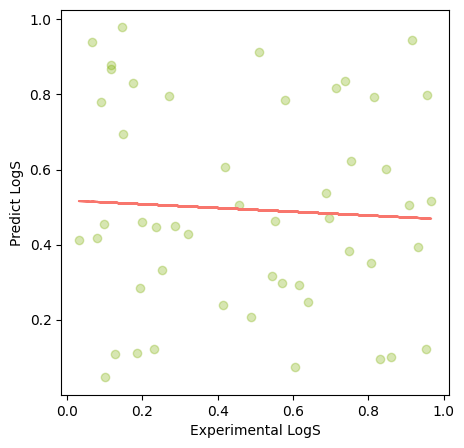

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data for demonstration
y_train = np.random.rand(50)  # Replace with your actual training data
y_lr_train_pred = np.random.rand(50) # Replace with your model predictions

plt.figure(figsize=(5,5) )
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')
plt.show()